In this experiment we will predict the number of overbooking an airline can do to increase revenue given that some passengers from every flights often miss the flight

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline

In [25]:
arrival = [1]*900
arrival.extend([0]*100)
data = pd.DataFrame({'passenger_id':list(range(1,1001)),
                     'Arrival':arrival})
data = data.sample(frac=1,random_state=2).reset_index(drop=True)
data.head()

,passenger_id,Arrival
0,38,1
1,727,1
2,847,1
3,296,1
4,925,0


<AxesSubplot:xlabel='passenger_id', ylabel='Count'>

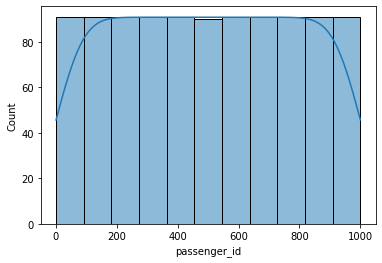

In [27]:
sns.histplot(data.passenger_id,kde=True)

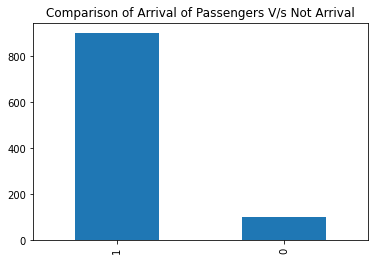

In [30]:
data.Arrival.value_counts().plot.bar(title='Comparison of Arrival of Passengers V/s Not Arrival')
plt.show()

In [31]:
prob_of_arrival = data.Arrival.value_counts(normalize=True)
prob_of_arrival

1    0.9
0    0.1
Name: Arrival, dtype: float64

*So brother their is a 90% probability of arrival of a passenger*

#### How many seats can we overbook?
Let us assume that every flight has a capacity of 100 people

  $(100 + x)*0.90 <= 100$
  
  $ x = 11$

  So we can overbook 11 seats(on average)

  Also consider if more than 100 passenger appear for flight given that we overbooked, their is a penalty of 20000 against the flight price 10000

In [39]:
prob_of_appear = prob_of_arrival[1]
PRICE = 10000
PENALTY = PRICE * 2
CAPACITY = 100


# Probability that exactly 101 passengers will appear given that we overbooked 11 passengers
'''
n = 111
x = 101
p = prob_of_appear
q = 1 - p

Use Binomial Distribution to calculate the probabilty
'''

stats.binom.pmf(k = 101, n = 111, p = prob_of_appear)

0.12321001647736995

In [38]:
n = 111
x = 101
n_x = n - x 

fact_n = math.factorial(111)
fact_x = math.factorial(101)
fact_n_x = math.factorial(10)

p = prob_of_appear
q = 1 - p 

(fact_n/(fact_x*fact_n_x))*(p**101)*(q**10)

0.12321001647736993

Tickets Sold: 100 | Net revenue: 1000000
Tickets Sold: 101 | Net revenue: 1010000
Tickets Sold: 102 | Net revenue: 1019994
Tickets Sold: 103 | Net revenue: 1029965
Tickets Sold: 104 | Net revenue: 1039853
Tickets Sold: 105 | Net revenue: 1049530
Tickets Sold: 106 | Net revenue: 1058768
Tickets Sold: 107 | Net revenue: 1067236
Tickets Sold: 108 | Net revenue: 1074539
Tickets Sold: 109 | Net revenue: 1080283
Tickets Sold: 110 | Net revenue: 1084158
Tickets Sold: 111 | Net revenue: 1085994
Tickets Sold: 112 | Net revenue: 1085791
Tickets Sold: 113 | Net revenue: 1083704
Tickets Sold: 114 | Net revenue: 1079991
Tickets Sold: 115 | Net revenue: 1074968
Tickets Sold: 116 | Net revenue: 1068948
Tickets Sold: 117 | Net revenue: 1062212
Tickets Sold: 118 | Net revenue: 1054988
Tickets Sold: 119 | Net revenue: 1047445


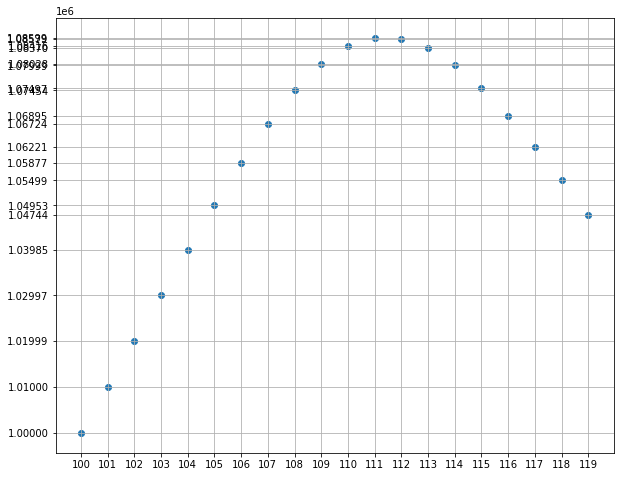

In [60]:
# Calculate expected penalty for different cases

def excepted_penalty(n_tickets):
    penalty = 0
    
    for extra in range(1,n_tickets - CAPACITY + 1):
        probability = stats.binom.pmf( k = CAPACITY + extra, n = n_tickets, p = prob_of_appear)
        penalty += (probability * PENALTY * extra)

    return penalty

tkts = []
rvnue = []

for ticket in range(100,120):
    revenue = PRICE * ticket
    penalty = excepted_penalty(ticket)
    net_revenue = round(revenue - penalty)
    print('Tickets Sold:',ticket,'| Net revenue:',net_revenue)
    tkts.append(ticket)
    rvnue.append(net_revenue)

plt.figure(figsize=(10,8))
plt.scatter(tkts,rvnue)
plt.xticks(tkts)
plt.yticks(rvnue)
plt.grid()
plt.show()

Let's plot the Probability Mass Function(not PDF) and CDF for 1000 generated data points for doing experiments

In [64]:
appear_distribution = stats.binom(n=111,p = prob_of_appear)
data = appear_distribution.rvs(1000)
data[:100]

array([103, 103, 100,  99, 102, 105, 105, 101,  97, 102, 100,  99, 102,
       103,  99,  98,  91,  98, 100, 103, 104,  96,  97, 100,  96, 104,
        94,  99,  97, 100, 100, 101, 103, 103,  93, 105,  98, 100,  97,
        99, 103,  98,  99,  98, 101,  97, 101, 100, 100,  90, 100,  97,
       101, 102, 100,  97, 103, 105, 102, 103,  96, 100,  97,  98, 103,
       101,  98, 105, 100,  99, 103, 104, 103, 102, 105, 102,  99,  97,
       103, 102,  99, 105,  96, 103, 104, 101,  96,  96, 105, 105, 102,
        96, 101,  99,  98, 102, 102,  97, 104, 101])

In [65]:
type(appear_distribution)

scipy.stats._distn_infrastructure.rv_frozen

In [66]:
# calculate bins using sturge law
bins = 1 + int(np.ceil(np.log2(1000)))
bins

11

In [67]:
# calculate bins using sturge law
bins = 1 + int(np.ceil(3.33*np.log10(1000)))
bins

11

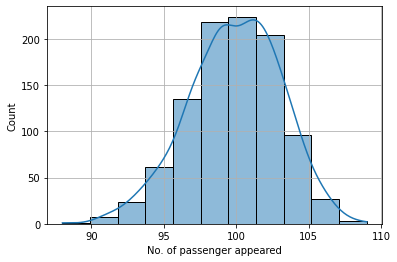

In [68]:
sns.histplot(data,bins=bins,kde=True)
plt.xlabel('No. of passenger appeared')
plt.grid()
plt.show()

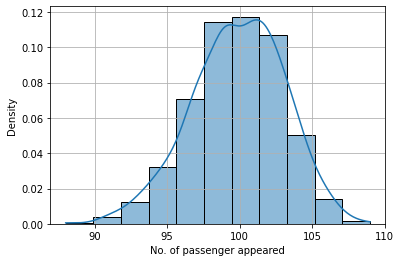

In [69]:
sns.histplot(data,bins=bins,kde=True,stat='density')
plt.xlabel('No. of passenger appeared')
plt.grid()
plt.show()

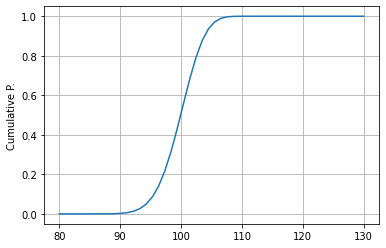

In [71]:
#CDF
x = np.linspace(80,130)

cdf = appear_distribution.cdf(x)
plt.plot(x,cdf)
plt.ylabel('Cumulative P.')
plt.grid()
plt.show()